## Case Study: 1, on Regression
- DSA Course, ICTAK
- Aravind A

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading the data into dataframe

In [2]:
data = pd.read_csv("car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


### Correlation

In [5]:
corr_matrix = data.corr()

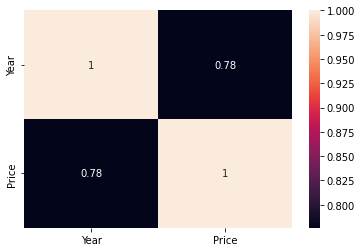

In [6]:
sns.heatmap(corr_matrix,annot=True)

### assigning values to x and y

In [7]:
y = data['Price']
x = data['Year']

In [8]:
x

0      2018
1      2019
2      2019
3      2018
4      2018
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 112, dtype: int64

In [9]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [10]:
# x_df = pd.DataFrame(x)
# y_df = pd.DataFrame(y)

In [11]:
x.shape, y.shape

((112,), (112,))

In [12]:
# x_df.shape, y_df.shape

- Reshaping the data to 2D array

In [13]:
x_new = np.array(x)

In [14]:
y_new = np.array(y)
y_new = y_new.reshape(-1,1)
x_new = x_new.reshape(-1,1)


In [15]:
y_new.shape, x_new.shape

((112, 1), (112, 1))

### Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=0.1, random_state=143)

In [18]:
model1 = LinearRegression()

In [19]:
model1.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = model1.predict(x_test)
y_pred

array([[414599.35561338],
       [496929.49018587],
       [414599.35561338],
       [496929.49018587],
       [496929.49018587],
       [414599.35561338],
       [496929.49018587],
       [414599.35561338],
       [496929.49018587],
       [414599.35561338],
       [496929.49018587],
       [620424.6920446 ]])

In [21]:
y_test

array([[400000],
       [490000],
       [465000],
       [540000],
       [495000],
       [350000],
       [575000],
       [300000],
       [520000],
       [350000],
       [550000],
       [700000]])

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

#### Mean Squared error and r2_score for Linear Regression

In [23]:
mean_squared_error(y_test, y_pred)

3492941924.4462256

In [30]:
r2_score(y_test, y_pred)

0.7019312066132792

### Price prediction for year 2022

In [68]:
model1.predict([[2022]])

array([[702754.82661709]])

- predicted price for year 2022 is 702754.83

### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

In [25]:
model2 = Lasso(alpha=0.1)

In [26]:
model2.fit(x_train, y_train)

Lasso(alpha=0.1)

In [27]:
lasso_pred = model2.predict(x_test)

In [28]:
lasso_pred

array([414599.41881041, 496929.47903346, 414599.41881041, 496929.47903346,
       496929.47903346, 414599.41881041, 496929.47903346, 414599.41881041,
       496929.47903346, 414599.41881041, 496929.47903346, 620424.56936803])

#### Mean Squared error and r2_score for Lasso Regression

In [29]:
mean_squared_error(y_test, lasso_pred)

3492946092.4786935

In [31]:
r2_score(y_test, lasso_pred)

0.7019308509359061

### prediction for year 2022

In [32]:
model2.predict([[2022]])

array([702754.62959108])

- Both regression models give very similar results